In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

sample = train_df.sample(5000, random_state=6313)

train_df['facility_rating'] = pd.Categorical(train_df['facility_rating'],
                                             categories= ['low','medium','high'],
                                             ordered=True)

### Basic Summary

In [80]:
df = train_df.copy()

print(df.shape)
print(df.columns)
df.info()
df.head()

(630000, 13)
Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                630000 non-null  int64   
 1   age               630000 non-null  int64   
 2   gender            630000 non-null  object  
 3   course            630000 non-null  object  
 4   study_hours       630000 non-null  float64 
 5   class_attendance  630000 non-null  float64 
 6   internet_access   630000 non-null  object  
 7   sleep_hours       630000 non-null  float64 
 8   sleep_quality     630000 non-null  object  
 9   study_method      630000 non-null  object  
 10  facility_rating   630000 non-null  category
 11  exa

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [59]:
df.sleep_hours.value_counts()

sleep_hours
9.90    18807
4.10    17928
9.20    12957
6.20    12608
9.70    12583
        ...  
4.41        1
4.82        1
4.55        1
4.65        1
4.62        1
Name: count, Length: 66, dtype: int64

In [15]:
df.describe(include='all')

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
count,630000.000000,630000.000000,630000,630000,630000.000000,630000.000000,630000,630000.000000,630000,630000,630000,630000,630000.000000
unique,NaN,NaN,3,7,NaN,NaN,2,NaN,3,5,3,3,NaN
top,NaN,NaN,other,b.tech,NaN,NaN,yes,NaN,poor,coaching,medium,moderate,NaN
freq,NaN,NaN,211097,131236,NaN,NaN,579423,NaN,213675,131697,214082,353982,NaN
mean,314999.500000,20.545821,NaN,NaN,4.002337,71.987261,NaN,7.072758,NaN,NaN,NaN,NaN,62.506672
std,181865.479132,2.260238,NaN,NaN,2.359880,17.430098,NaN,1.744811,NaN,NaN,NaN,NaN,18.916884
min,0.000000,17.000000,NaN,NaN,0.080000,40.600000,NaN,4.100000,NaN,NaN,NaN,NaN,19.599000
25%,157499.750000,19.000000,NaN,NaN,1.970000,57.000000,NaN,5.600000,NaN,NaN,NaN,NaN,48.800000
50%,314999.500000,21.000000,NaN,NaN,4.000000,72.600000,NaN,7.100000,NaN,NaN,NaN,NaN,62.600000
75%,472499.250000,23.000000,NaN,NaN,6.050000,87.200000,NaN,8.600000,NaN,NaN,NaN,NaN,76.300000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

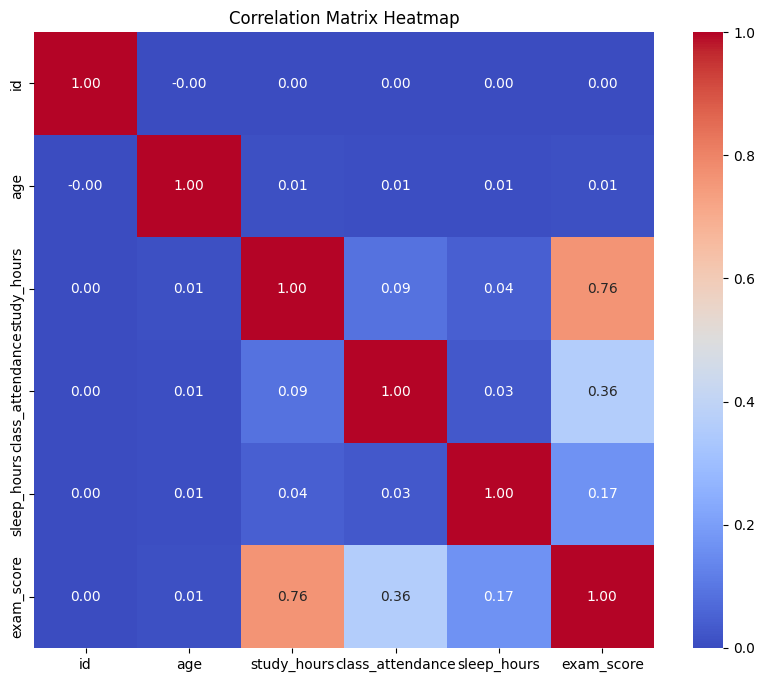

In [20]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

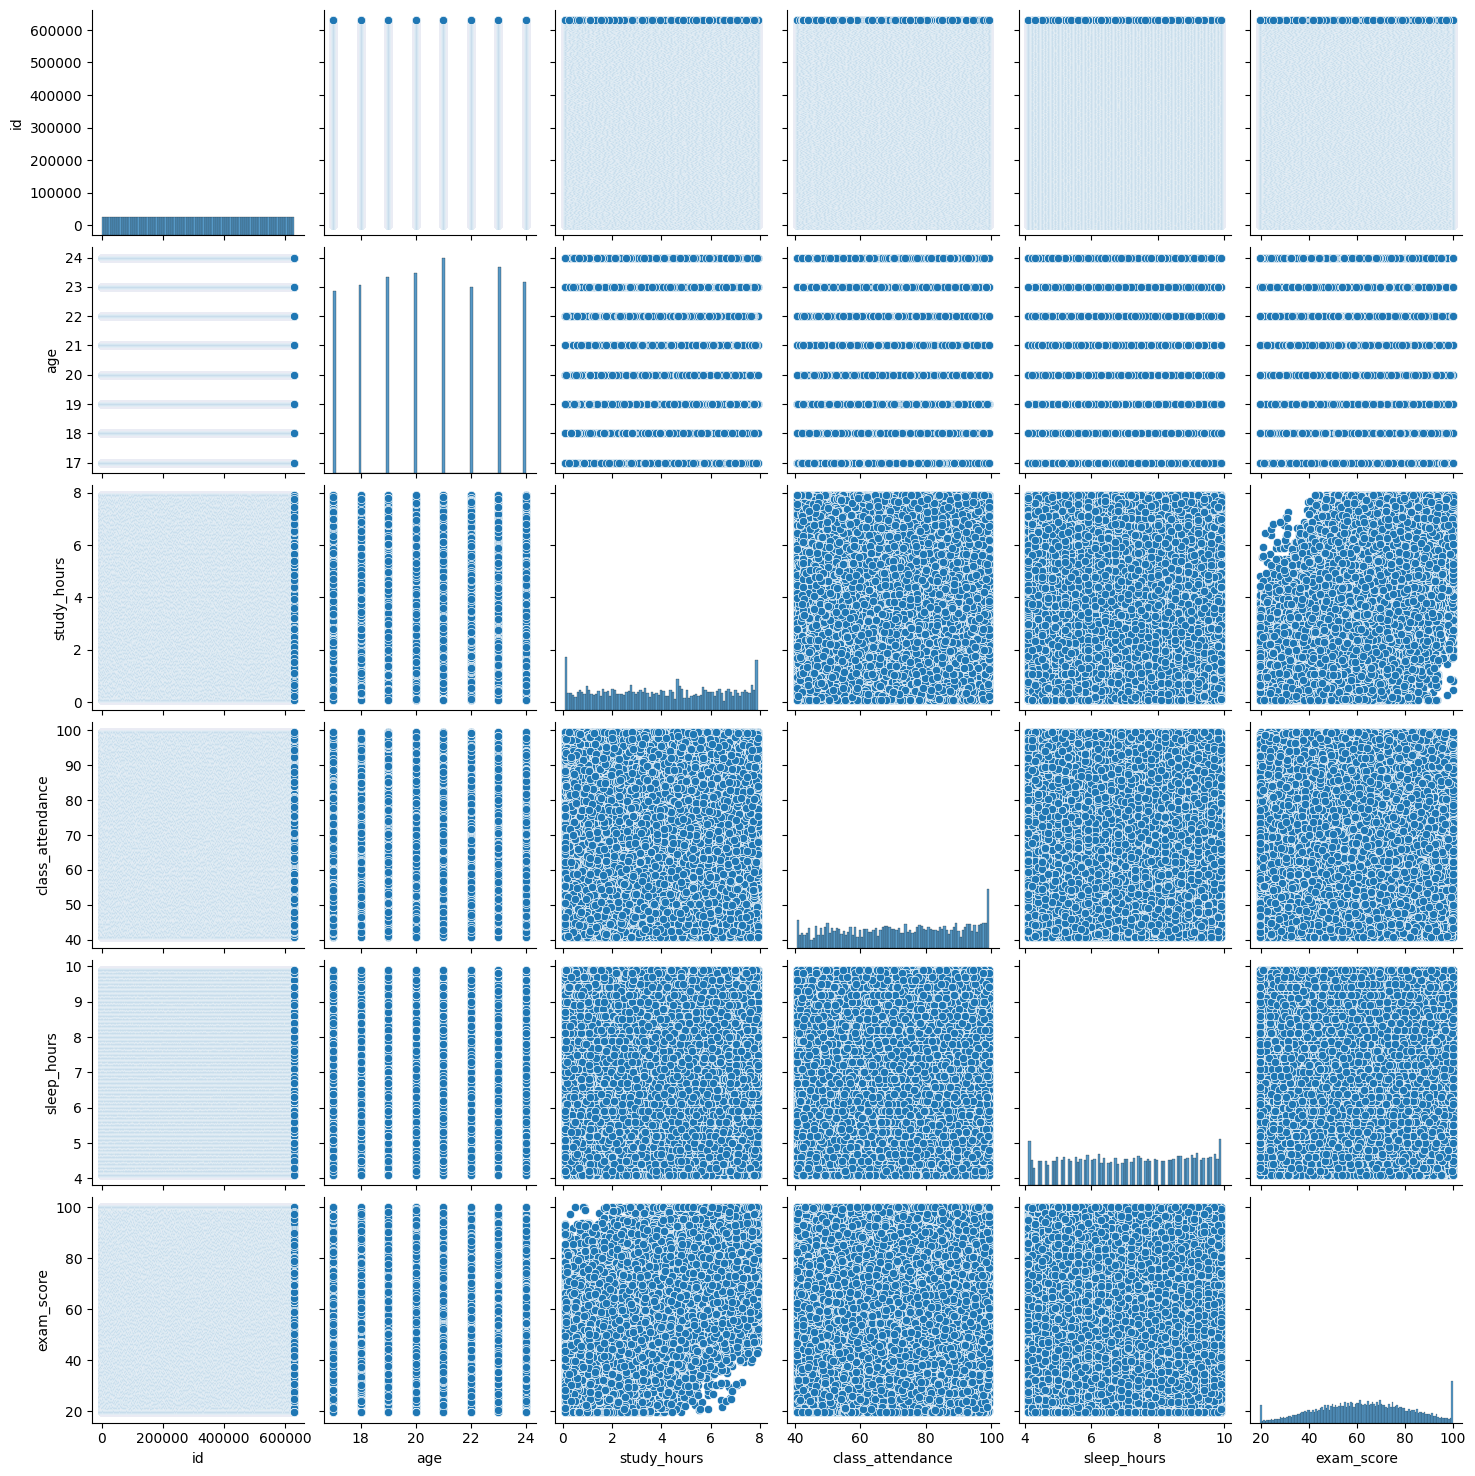

In [40]:
sns.pairplot(df)

### Visualizations

In [47]:
df["exam_difficulty"].value_counts(normalize=True)

exam_difficulty
moderate    0.561876
easy        0.280222
hard        0.157902
Name: proportion, dtype: float64

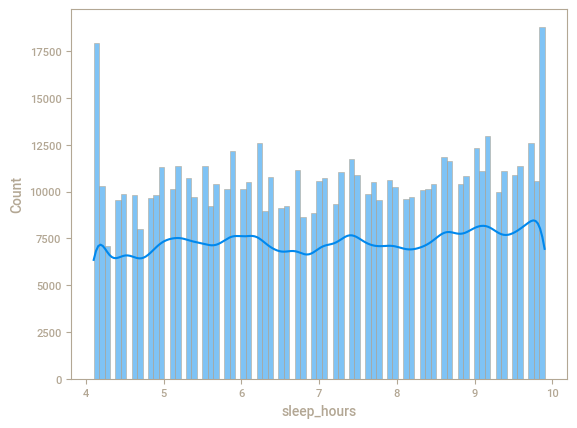

In [60]:
sns.histplot(data=df, x='sleep_hours', kde=True)
plt.show()

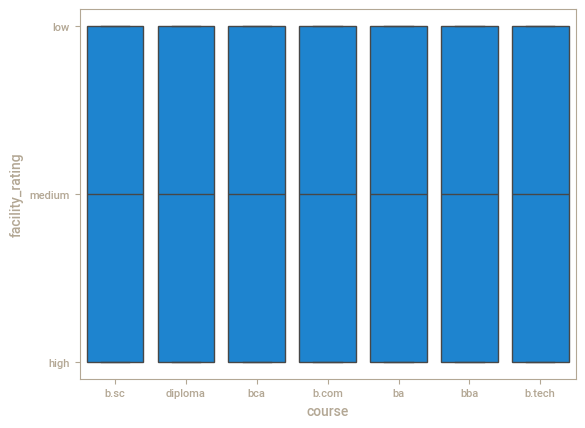

In [ ]:
sns.boxplot(data=df, x='course', y='facility_rating')
plt.show()

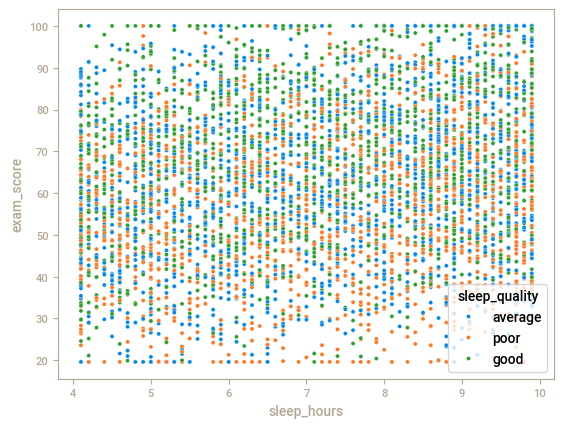

In [62]:
sns.scatterplot(data=sample, x='sleep_hours', y='exam_score', hue='sleep_quality')
plt.show()

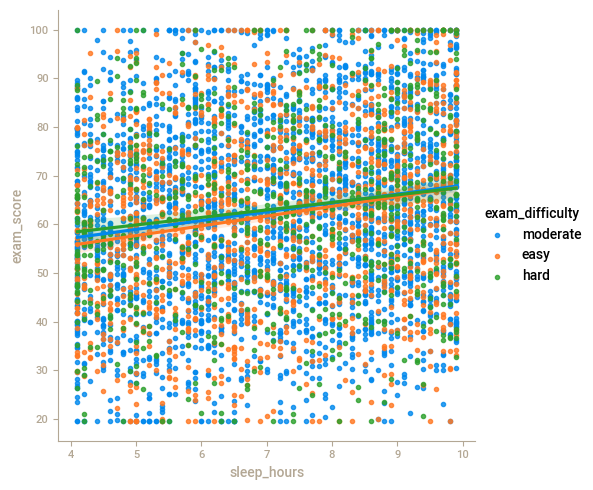

In [64]:
sns.lmplot(data=sample, x='sleep_hours', y='exam_score', hue='exam_difficulty')
plt.show()

In [81]:
pd.crosstab(df['course'], df['facility_rating'], normalize='index')

facility_rating,low,medium,high
course,,,
b.com,0.338162,0.350016,0.311822
b.sc,0.345277,0.329437,0.325286
b.tech,0.339343,0.325924,0.334733
ba,0.331026,0.348433,0.320541
bba,0.332677,0.340754,0.326569
bca,0.338612,0.347900,0.313488
diploma,0.322230,0.350333,0.327438


### Linear Regression

In [ ]:
import statsmodels.api as sm
# https://www.statsmodels.org/stable/index.html

x_cols = ['sleep_hours', 'sleep_quality']
x_dummies = ['sleep_quality']
y_col = 'exam_score'

X = pd.get_dummies(df[x_cols], 
                   columns= x_dummies, 
                   drop_first=True,
                   dtype=float)
X = X.astype(float)
X = sm.add_constant(X)

y = df[y_col]
y = y.astype(float)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 1.881e+04
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:15:57   Log-Likelihood:            -2.7191e+06
No. Observations:              630000   AIC:                         5.438e+06
Df Residuals:                  629996   BIC:                         5.438e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.2643      0

In [57]:
import statsmodels.formula.api as smf

model = smf.ols('exam_score ~ sleep_hours * C(sleep_quality)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        20:34:24   Log-Likelihood:            -2.7191e+06
No. Observations:              630000   AIC:                         5.438e+06
Df Residuals:                  629994   BIC:                         5.438e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Fun Stuff

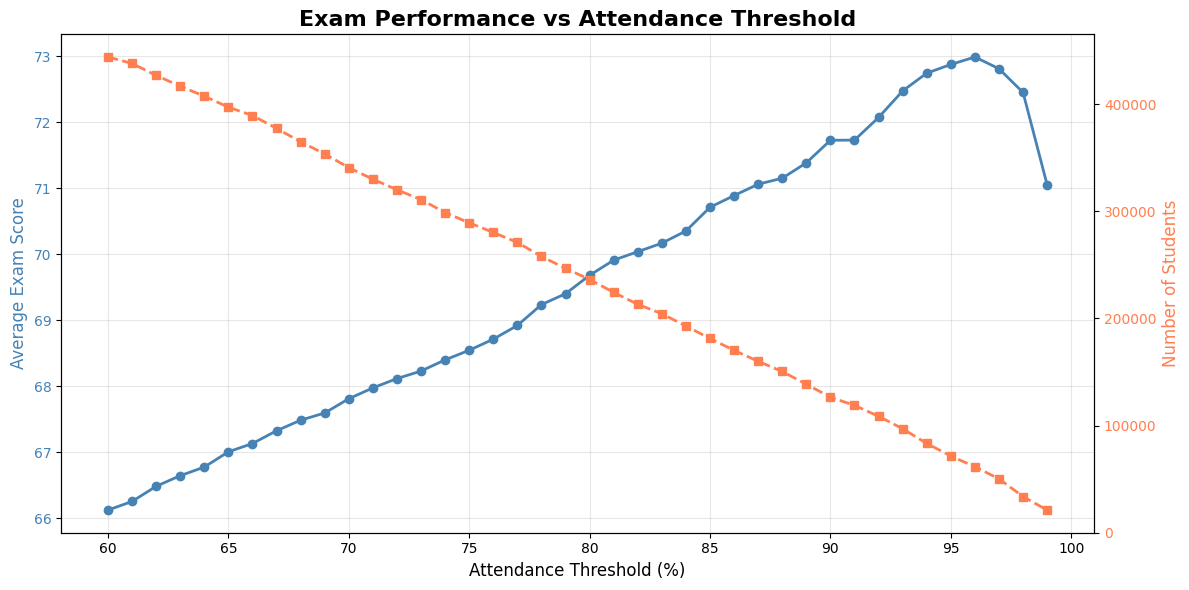

In [18]:
thresholds = range(60, 100, 1)

# Calculate average exam score for each threshold
results = []
for threshold in thresholds:
    df['perfect_attendance'] = np.where(df['class_attendance'] >= threshold, 1, 0)
    avg_score = df[df['perfect_attendance'] == 1]['exam_score'].mean()
    count = df[df['perfect_attendance'] == 1].shape[0]
    results.append({
        'threshold': threshold,
        'avg_exam_score': avg_score,
        'count': count
    })

results_df = pd.DataFrame(results)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Average exam score
color = 'steelblue'
ax1.set_xlabel('Attendance Threshold (%)', fontsize=12)
ax1.set_ylabel('Average Exam Score', color=color, fontsize=12)
ax1.plot(results_df['threshold'], results_df['avg_exam_score'], 
         marker='o', color=color, linewidth=2, label='Avg Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.3)

# Count (secondary axis)
ax2 = ax1.twinx()
color = 'coral'
ax2.set_ylabel('Number of Students', color=color, fontsize=12)
ax2.plot(results_df['threshold'], results_df['count'], 
         marker='s', color=color, linewidth=2, linestyle='--', label='Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Exam Performance vs Attendance Threshold', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

C:\Users\mcqui\AppData\Local\Temp\ipykernel_17296\3911013636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='internet_access', y='exam_score',
C:\Users\mcqui\AppData\Local\Temp\ipykernel_17296\3911013636.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sleep_quality', y='exam_score',


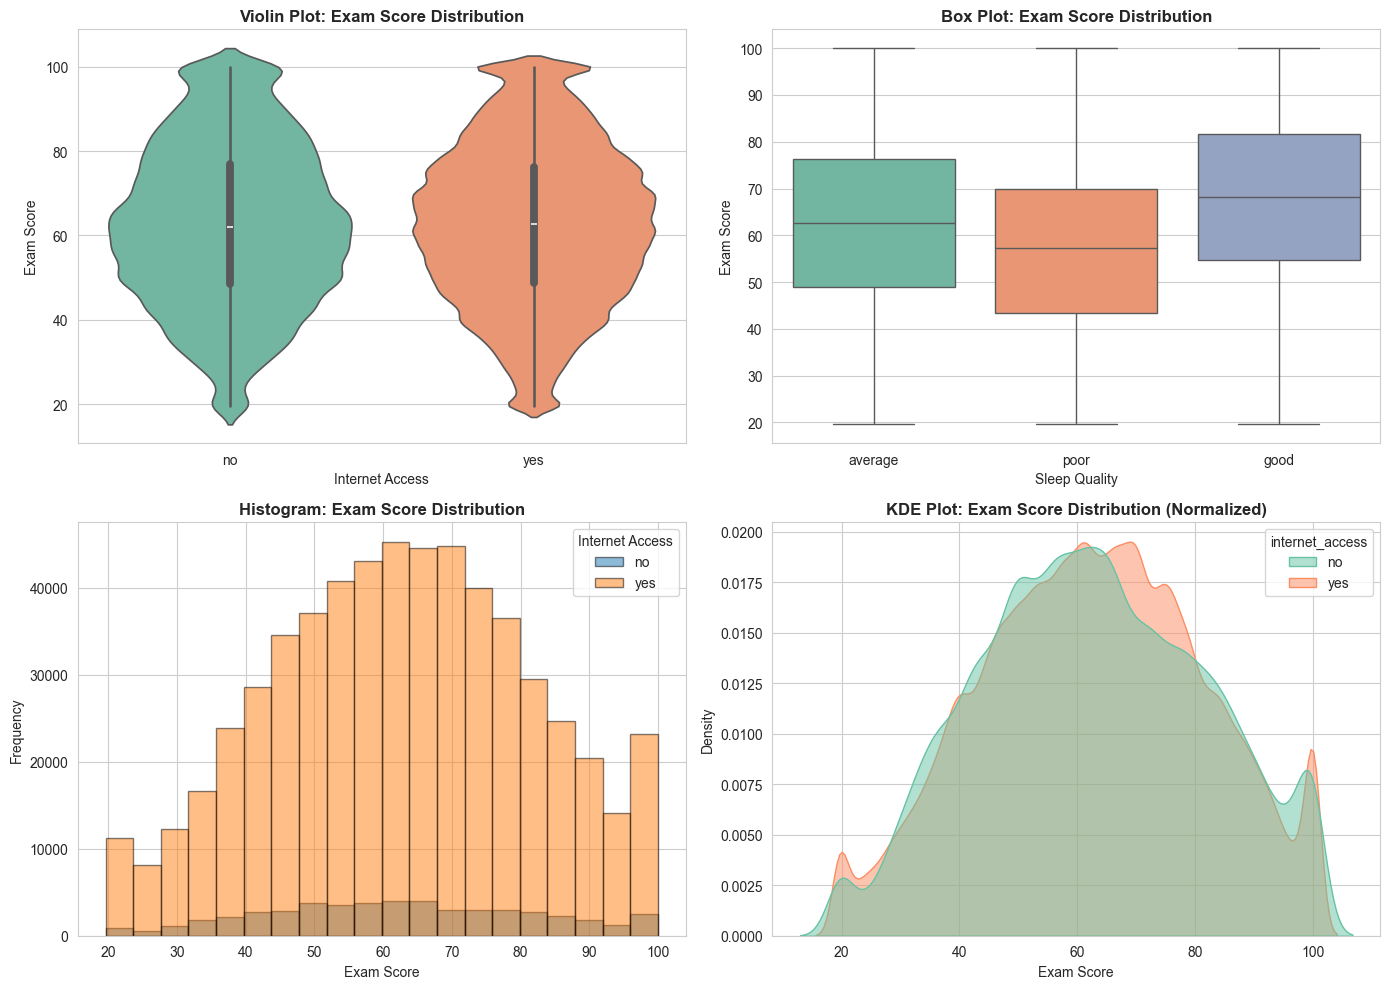

In [19]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Violin plot - shows full distribution shape
sns.violinplot(data=df, x='internet_access', y='exam_score', 
               palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Violin Plot: Exam Score Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Internet Access', fontsize=10)
axes[0, 0].set_ylabel('Exam Score', fontsize=10)

# 2. Box plot - shows quartiles and outliers
sns.boxplot(data=df, x='sleep_quality', y='exam_score', 
            palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot: Exam Score Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sleep Quality', fontsize=10)
axes[0, 1].set_ylabel('Exam Score', fontsize=10)

# 3. Histogram with KDE - overlapping distributions
for access_type in df['internet_access'].unique():
    subset = df[df['internet_access'] == access_type]['exam_score']
    axes[1, 0].hist(subset, alpha=0.5, label=access_type, bins=20, edgecolor='black')
axes[1, 0].set_title('Histogram: Exam Score Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Exam Score', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].legend(title='Internet Access')

# 4. KDE plot - smooth distribution curves (standardized by default)
sns.kdeplot(data=df, x='exam_score', hue='internet_access', 
            fill=True, alpha=0.5, palette='Set2', common_norm=False, ax=axes[1, 1])
axes[1, 1].set_title('KDE Plot: Exam Score Distribution (Normalized)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Exam Score', fontsize=10)
axes[1, 1].set_ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\mcqui\AppData\Local\Temp\ipykernel_17296\536323386.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = df_sorted.groupby(bins)['exam_score'].agg(['mean', 'count'])
C:\Users\mcqui\AppData\Local\Temp\ipykernel_17296\536323386.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mcqui\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


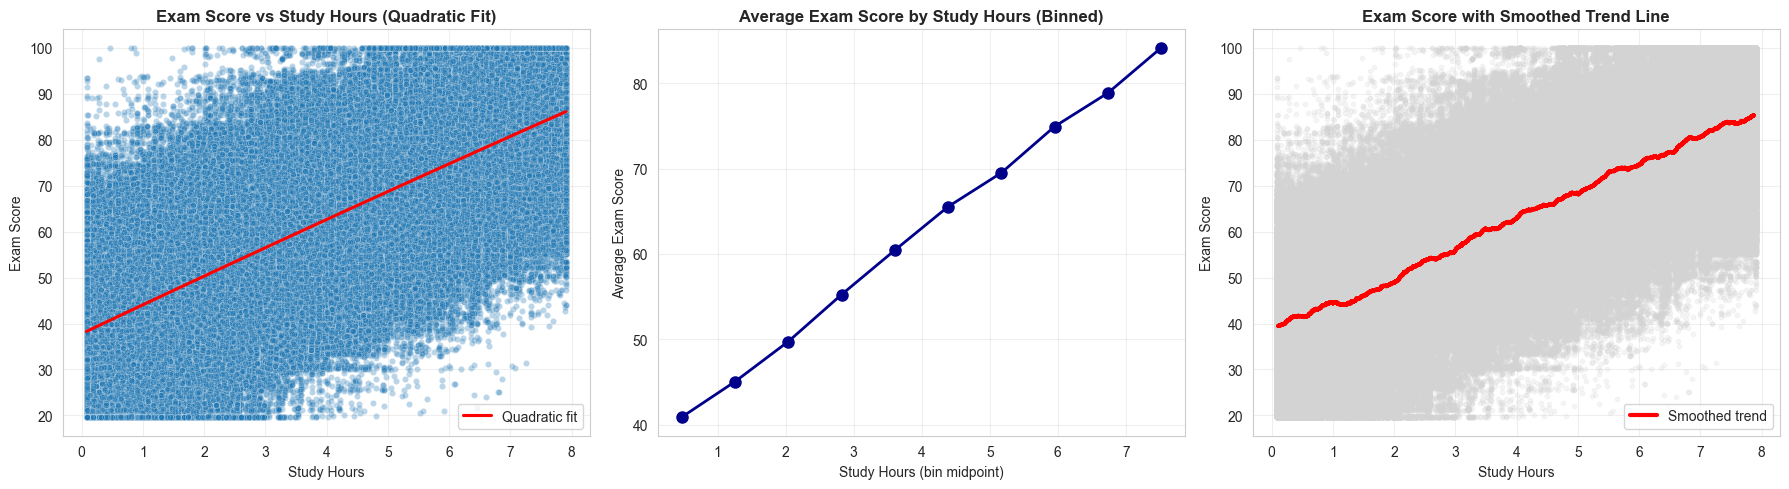

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Scatterplot with quadratic fit
sns.scatterplot(data=df, x='study_hours', y='exam_score', 
                alpha=0.3, s=20, ax=axes[0])  # Changed from axes[0, 0]
sns.regplot(data=df, x='study_hours', y='exam_score', 
            scatter=False, order=2, color='red', 
            label='Quadratic fit', ax=axes[0])
axes[0].set_title('Exam Score vs Study Hours (Quadratic Fit)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Study Hours')
axes[0].set_ylabel('Exam Score')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Binned averages
df_sorted = df.sort_values('study_hours')
bins = pd.cut(df_sorted['study_hours'], bins=10)
binned_avg = df_sorted.groupby(bins)['exam_score'].agg(['mean', 'count'])
binned_avg['study_hours_mid'] = binned_avg.index.map(lambda x: x.mid)

# Convert to numeric and reset index
binned_avg = binned_avg.reset_index(drop=True)

axes[1].plot(binned_avg['study_hours_mid'], binned_avg['mean'],  # Changed from axes[0, 1]
             marker='o', linewidth=2, markersize=8, color='darkblue')
axes[1].set_title('Average Exam Score by Study Hours (Binned)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Study Hours (bin midpoint)')
axes[1].set_ylabel('Average Exam Score')
axes[1].grid(alpha=0.3)

# 3. Smoothed trend line
sorted_df = df.sort_values('study_hours')
window = max(len(df) // 20, 50)
sorted_df['smoothed_score'] = sorted_df['exam_score'].rolling(
    window=window, center=True).mean()

axes[2].scatter(df['study_hours'], df['exam_score'],  # Changed from axes[0, 2]
                alpha=0.2, s=10, color='lightgray')
axes[2].plot(sorted_df['study_hours'], sorted_df['smoothed_score'], 
             color='red', linewidth=3, label='Smoothed trend')
axes[2].set_title('Exam Score with Smoothed Trend Line', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Study Hours')
axes[2].set_ylabel('Exam Score')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()